In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lams = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lams, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | kolobrzeg
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | pangody
Processing Record 11 of Set 1 | gizo
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | tingrela
City not found. Skipping...
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | bambanglipuro
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | h

Processing Record 34 of Set 4 | airai
Processing Record 35 of Set 4 | qaanaaq
Processing Record 36 of Set 4 | coruripe
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | san quintin
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | warqla
City not found. Skipping...
Processing Record 41 of Set 4 | rovaniemi
Processing Record 42 of Set 4 | kumluca
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | sao felix do xingu
Processing Record 45 of Set 4 | launceston
Processing Record 46 of Set 4 | sol-iletsk
Processing Record 47 of Set 4 | antiguo morelos
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | beyneu
Processing Record 50 of Set 4 | meulaboh
Processing Record 1 of Set 5 | saint-louis
Processing Record 2 of Set 5 | kerouane
Processing Record 3 of Set 5 | puerto narino
Processing Record 4 of Set 5 | tanout
Processing Record 5 of Set 5 | beloha
Processing Record 6 of Set 5 | port lincoln
Processing Record 

Processing Record 26 of Set 8 | do gonbadan
Processing Record 27 of Set 8 | deputatskiy
Processing Record 28 of Set 8 | roma
Processing Record 29 of Set 8 | nyurba
Processing Record 30 of Set 8 | pallasovka
Processing Record 31 of Set 8 | jutai
Processing Record 32 of Set 8 | dulce nombre de culmi
Processing Record 33 of Set 8 | jumla
Processing Record 34 of Set 8 | aklavik
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | kasungu
Processing Record 37 of Set 8 | sinop
Processing Record 38 of Set 8 | los llanos de aridane
Processing Record 39 of Set 8 | praya
Processing Record 40 of Set 8 | biella
Processing Record 41 of Set 8 | tygda
Processing Record 42 of Set 8 | vestmannaeyjar
Processing Record 43 of Set 8 | tidore
City not found. Skipping...
Processing Record 44 of Set 8 | griffith
Processing Record 45 of Set 8 | chingirlau
Processing Record 46 of Set 8 | berdigestyakh
Processing Record 47 of Set 8 | sobolevo
Processing Record 48 of Set 8 | nanakuli
Proces

Processing Record 16 of Set 12 | istok
Processing Record 17 of Set 12 | namibe
Processing Record 18 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 19 of Set 12 | floro
Processing Record 20 of Set 12 | kilvelur
Processing Record 21 of Set 12 | stephenville
Processing Record 22 of Set 12 | mayo
Processing Record 23 of Set 12 | saint-pierre
Processing Record 24 of Set 12 | ostuni
Processing Record 25 of Set 12 | boromo
Processing Record 26 of Set 12 | kailua
Processing Record 27 of Set 12 | margate
Processing Record 28 of Set 12 | kyshtovka
Processing Record 29 of Set 12 | camapua
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.79,-152.41,39.20,69,75,23.04,US,2020-11-24 00:23:57
1,Butaritari,3.07,172.79,81.82,75,62,10.58,KI,2020-11-24 00:26:55
2,Hobart,-42.88,147.33,68.00,51,75,6.93,AU,2020-11-24 00:22:20
3,Puerto Ayora,-0.74,-90.35,69.37,81,58,9.10,EC,2020-11-24 00:24:38
4,Kolobrzeg,54.18,15.58,43.00,91,76,20.47,PL,2020-11-24 00:26:55
5,Ushuaia,-54.80,-68.30,46.40,49,40,21.92,AR,2020-11-24 00:23:12
6,Cape Town,-33.93,18.42,60.01,87,75,9.17,ZA,2020-11-24 00:22:20
7,Barrow,71.29,-156.79,1.40,77,1,11.41,US,2020-11-24 00:26:55
8,Thompson,55.74,-97.86,8.60,84,90,5.82,CA,2020-11-24 00:26:56
9,Pangody,65.85,74.49,12.06,95,62,14.47,RU,2020-11-24 00:26:56


In [8]:
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2020-11-24 00:23:57,57.79,-152.41,39.20,69,75,23.04
1,Butaritari,KI,2020-11-24 00:26:55,3.07,172.79,81.82,75,62,10.58
2,Hobart,AU,2020-11-24 00:22:20,-42.88,147.33,68.00,51,75,6.93
3,Puerto Ayora,EC,2020-11-24 00:24:38,-0.74,-90.35,69.37,81,58,9.10
4,Kolobrzeg,PL,2020-11-24 00:26:55,54.18,15.58,43.00,91,76,20.47
...,...,...,...,...,...,...,...,...,...
528,Boromo,BF,2020-11-24 00:28:29,11.75,-2.93,74.10,19,1,4.52
529,Kailua,US,2020-11-24 00:28:29,21.40,-157.74,81.00,65,75,10.29
530,Margate,GB,2020-11-24 00:25:07,51.38,1.39,50.00,82,20,1.99
531,Kyshtovka,RU,2020-11-24 00:28:29,56.55,76.63,13.37,93,6,2.77


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

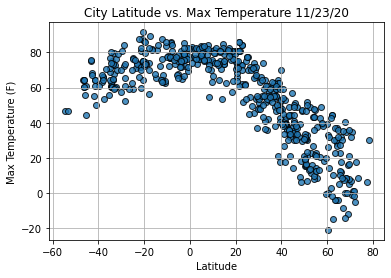

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Max_temps.png")

# Show plot.
plt.show()

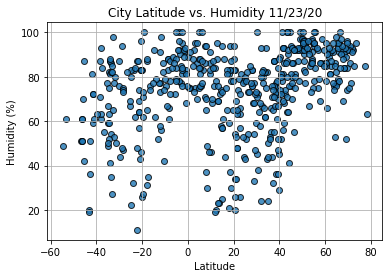

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Humidity.png")
# Show plot.
plt.show()

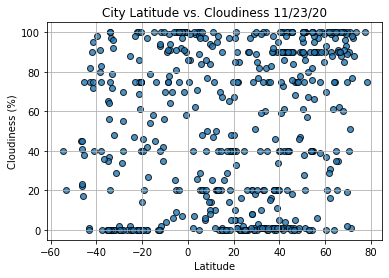

In [13]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Cloudiness.png")
# Show plot.
plt.show()

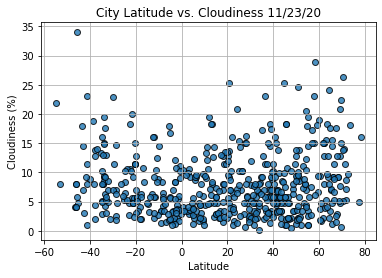

In [14]:
# Build the scatter plots for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/wind_speed.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()  

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

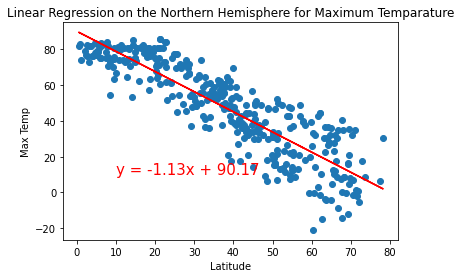

In [43]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temparature', 'Max Temp',(10,10))

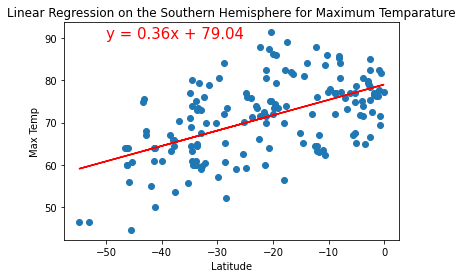

In [44]:
#Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temparature', 'Max Temp',(-50,90))

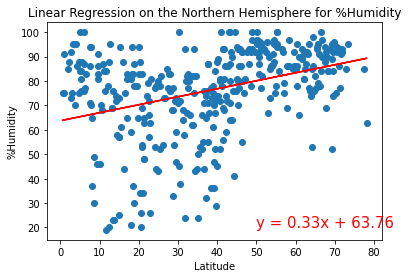

In [45]:
#Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere for %Humidity','%Humidity', (50,20))

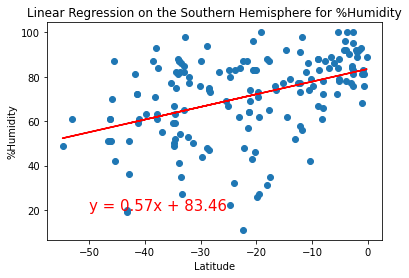

In [46]:
#Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere for %Humidity','%Humidity', (-50,20))

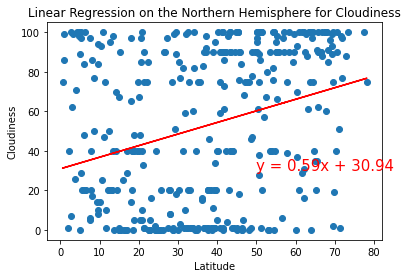

In [47]:
#Linear regression on the Northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere for Cloudiness','Cloudiness', (50,30))

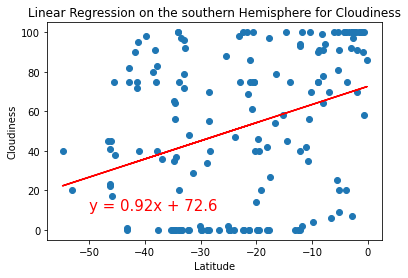

In [48]:
#Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the southern Hemisphere for Cloudiness','Cloudiness', (-50,10))

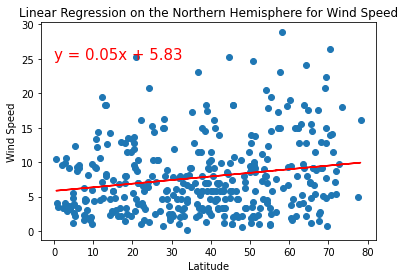

In [49]:
#Linear regression on the Northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere for Wind Speed','Wind Speed', (0,25))

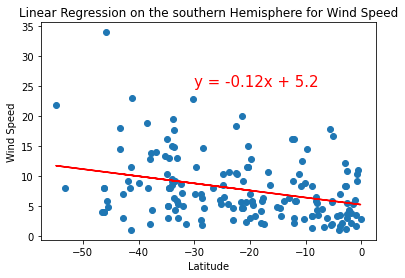

In [50]:
#Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the southern Hemisphere for Wind Speed','Wind Speed', (-30,25))